In [9]:
#Q1)
import zipfile
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

zip_file_path = '/content/online+shoppers+purchasing+intention+dataset.zip'
extract_folder = '/content/online_shoppers_dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

extracted_files = os.listdir(extract_folder)
print("Extracted files:", extracted_files)

file_path = os.path.join(extract_folder, 'online_shoppers_intention.csv')
df = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(df.head())

X_train = df[['Region']]
y_train = df['Revenue']

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

reg = LinearRegression()
reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)

print("First few predictions on training data:")
print(y_train_pred[:5])

mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_train, y_train_pred)
print(f"R-squared: {r2}")


Extracted files: ['online_shoppers_intention.csv']
First few rows of the dataset:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   F

In [8]:
#Q2)
import zipfile
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

zip_file_path = '/content/online+shoppers+purchasing+intention+dataset.zip'
extract_folder = '/content/online_shoppers_dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

extracted_files = os.listdir(extract_folder)
print("Extracted files:", extracted_files)

file_path = os.path.join(extract_folder, 'online_shoppers_intention.csv')
df = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(df.head())

X = df[['Region']]
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

def calculate_mape(y_true, y_pred):
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

mape_train = calculate_mape(y_train, y_train_pred)
mape_test = calculate_mape(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training Set Metrics:")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAPE: {mape_train}%")
print(f"R²: {r2_train}")

print(f"\nTest Set Metrics:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAPE: {mape_test}%")
print(f"R²: {r2_test}")


Extracted files: ['online_shoppers_intention.csv']
First few rows of the dataset:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   F

In [5]:
#Q3)
import zipfile
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
X = df.drop(columns=['Revenue'])
y = df['Revenue']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

categorical_features = ['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'SpecialDay']  # List of your categorical features
encoded_features = encoder.fit_transform(X[categorical_features])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

def calculate_mape(y_true, y_pred):
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

mape_train = calculate_mape(y_train, y_train_pred)
mape_test = calculate_mape(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training Set Metrics:")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAPE: {mape_train}%")
print(f"R²: {r2_train}")

print(f"\nTest Set Metrics:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAPE: {mape_test}%")
print(f"R²: {r2_test}")


Training Set Metrics:
MSE: 0.09072237711330365
RMSE: 0.30120155562895695
MAPE: 63.56524059748663%
R²: 0.2952599077546937

Test Set Metrics:
MSE: 0.10041339289083649
RMSE: 0.3168807234447001
MAPE: 64.56739624963416%
R²: 0.2770235711859772


In [7]:
!pip install scikit-learn pandas

#Q4)
import zipfile
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

zip_file_path = '/content/online+shoppers+purchasing+intention+dataset.zip'
extract_folder = '/content/online_shoppers_dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

extracted_files = os.listdir(extract_folder)
print("Extracted files:", extracted_files)

file_path = os.path.join(extract_folder, 'online_shoppers_intention.csv')
df = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(df.head())

X = df.drop(columns=['Revenue'])
y = df['Revenue']

categorical_features = ['Month', 'VisitorType', 'Weekend', 'OperatingSystems',
                        'Browser', 'Region', 'TrafficType', 'SpecialDay']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_features = encoder.fit_transform(X[categorical_features])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_df], axis=1)

kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto')
kmeans.fit(X)

cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

print("\nCluster Labels:")
print(cluster_labels)

print("\nCluster Centers:")
print(cluster_centers)

df['Cluster_Label'] = cluster_labels

print("\nDataset with Cluster Labels:")
print(df.head())

Extracted files: ['online_shoppers_intention.csv']
First few rows of the dataset:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   F

In [11]:
!pip install scikit-learn pandas

#Q5)
import zipfile
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import OneHotEncoder

zip_file_path = '/content/online+shoppers+purchasing+intention+dataset.zip'
extract_folder = '/content/online_shoppers_dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

extracted_files = os.listdir(extract_folder)
print("Extracted files:", extracted_files)

file_path = os.path.join(extract_folder, 'online_shoppers_intention.csv')
df = pd.read_csv(file_path)

categorical_features = ['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'SpecialDay']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

X = df.drop(columns=categorical_features + ['Revenue'])
X = pd.concat([X, encoded_df], axis=1)

kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto').fit(X)

silhouette = silhouette_score(X, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X, kmeans.labels_)

print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

Extracted files: ['online_shoppers_intention.csv']
Silhouette Score: 0.7814789150875345
Calinski-Harabasz Score: 13878.825291882085
Davies-Bouldin Index: 0.5559454569526625


Extracted files: ['online_shoppers_intention.csv']


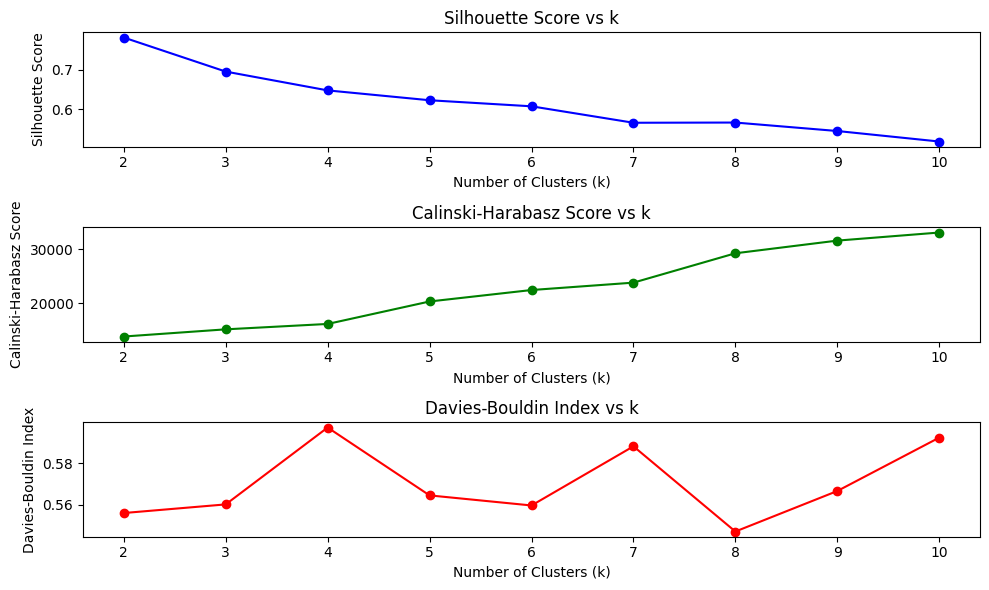

In [13]:
!pip install scikit-learn pandas
#Q6)
import zipfile
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

zip_file_path = '/content/online+shoppers+purchasing+intention+dataset.zip'
extract_folder = '/content/online_shoppers_dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

extracted_files = os.listdir(extract_folder)
print("Extracted files:", extracted_files)

file_path = os.path.join(extract_folder, 'online_shoppers_intention.csv')
df = pd.read_csv(file_path)

categorical_features = ['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'SpecialDay']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

X = df.drop(columns=categorical_features + ['Revenue'])
X = pd.concat([X, encoded_df], axis=1)

k_values = range(2, 11)
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X)
    silhouette = silhouette_score(X, kmeans.labels_)
    calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)
    davies_bouldin = davies_bouldin_score(X, kmeans.labels_)

    silhouette_scores.append(silhouette)
    calinski_harabasz_scores.append(calinski_harabasz)
    davies_bouldin_scores.append(davies_bouldin)

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(3, 1, 2)
plt.plot(k_values, calinski_harabasz_scores, marker='o', linestyle='-', color='g')
plt.title('Calinski-Harabasz Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

plt.subplot(3, 1, 3)
plt.plot(k_values, davies_bouldin_scores, marker='o', linestyle='-', color='r')
plt.title('Davies-Bouldin Index vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

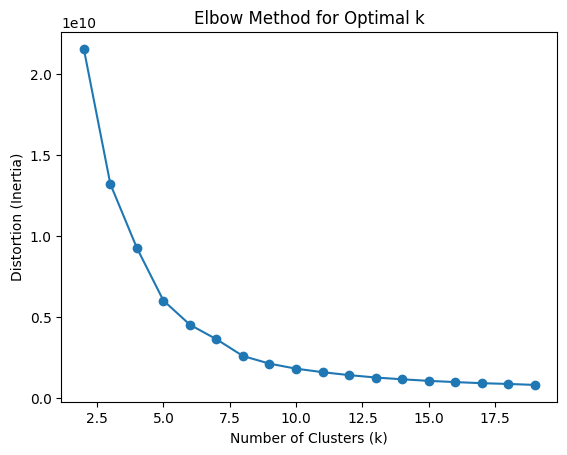

In [14]:
!pip install scikit-learn pandas matplotlib
#Q7)
import zipfile
import os
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

zip_file_path = '/content/online+shoppers+purchasing+intention+dataset.zip'
extract_folder = '/content/online_shoppers_dataset'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
file_path = os.path.join(extract_folder, 'online_shoppers_intention.csv')
df = pd.read_csv(file_path)
categorical_features = ['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'SpecialDay']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
X = df.drop(columns=categorical_features + ['Revenue'])
X = pd.concat([X, encoded_df], axis=1)

distortions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X)
    distortions.append(kmeans.inertia_)
plt.plot(range(2, 20), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.show()